In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from textutils import TextProcessor

In [2]:
%time TextProcessor.preprocess_folder('wiki_data/bulgarian', lang='ru_con', join=False)

Try to preprocess documents in wiki_data
	---> wiki_data/bulgarian(ru).txt
Files are successfully processed to wiki_data/processed
CPU times: user 4min 1s, sys: 25.3 s, total: 4min 26s
Wall time: 4min 40s


In [88]:
with open('wiki_data/bulgarian/processed/all.txt', 'r') as processed_file:
    bulgarian_all = processed_file.read().replace('\n', '').decode('utf-8')

In [85]:
print "Длина документа: " + str(len(bulgarian_all))
print
print bulgarian_all[:1000]

Длина документа: 136528535

гргрнскклндргргрнсктклндрпнкгнрчнгргрнскклндрнвстлсъврмннтмжднрднпрзнтсвтскклндрнкйтсснввмжднрднтстндртгргрнсктклндрвъвднвптрбнктмвргвсътвтствсблтфврргнппгргрйчтмнсднстйппрвдрвнрмсклнскклндрктвнгсннсннккркцздстчтптчндължнтнтрпчсктгднвлнскклндрспрмчврмтмжддвпслдвтлнпрлтнрвнднствдндрбнтчстскмпнсрктдннвскчтргднмсднднпвчвскснгднпргргрнскклндргднткртнннсвскснсзклчннгднткртннтнвскчтрвкспрпскттрвскснгднктнпрмргднктдвсрднпрдължтлнстнгднттднтзстйнстсдблжвзнчтлндпрдължтлнсттнтрпчсктгдннпрмрврмтмждпрлтнтрвнднствпрзгднднгргрнсктклндрвъзпртврзлчнтстрнпрзлчнврмкттзпрцспрдължвпчттрвкплвнвъвднвбългрсъсзкнглсвнтнрднтсъбрннмртгкттчтнтнврмтднствнпнвстлзпчвтпрлгспрдлнскклндрпрлспрдгргрнскклндргргрнсктклндрслънчвклндрзвсмтпрднзвъртнтнзмтклслънцткйтднтчспмнтвскпскндсрднттрпчскгднднчсмнтскндтвррслбсднддвмнтвзвсмсттнчлнттчктчнтстйнстзчслнннргднднсрднтгднпргргрнскклндрднздмжбртнгдшнтдндцлчслпрзпрдлнпрднйчстгднсдбвдндпълнтлнднфврргднтснрчвскснтткслдврзпрдлнтнвскснтгднгргрнсктклндрсдл

In [89]:
from textutils import TextUtils

normalized_dict = TextUtils.get_normalized_dict (
    TextUtils.get_n_gram_dict(bulgarian_all.encode('utf-8'), 1, lang='ru_con')
)
ordered_dict = TextUtils.get_ordered_dict(normalized_dict, by='value', reverse=True)

In [90]:
def draw__ordered_dict(dct, size=(10, 8)):
    non_zero_items = np.array(dct)[:,0]
    non_zero_values = np.array(ordered_dict)[:,1].astype(np.float64)
    
    plt.figure(figsize=size)
    ax = sns.barplot(x=non_zero_items, y=non_zero_values, color="#666699")
    
    ax.set_ylabel('Probabilities')
    ax.set_title('Text symbols distribution')
    ax.set_xticklabels(non_zero_items)
    
    plt.show()

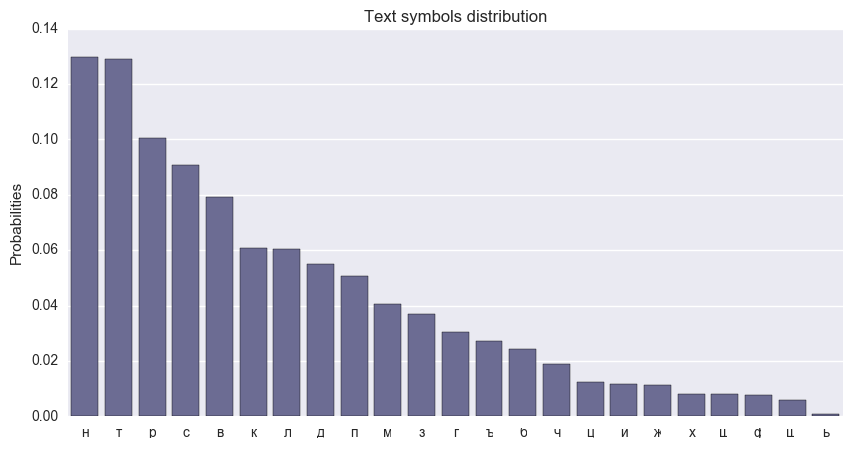

In [91]:
draw__ordered_dict(ordered_dict, (10, 5))

#### Caculate Hurst values for 'н' letter

In [103]:
from textutils import HurstExponent
hurst = HurstExponent(bulgarian_all, u'н')

In [104]:
len(hurst.distances)

17733133

In [105]:
%time hurst.calculate(10000)

CPU times: user 37min 43s, sys: 4.76 s, total: 37min 48s
Wall time: 18h 16min 17s


(array([   9.,   24.,   56.,  114.,  198.,  265.,  283.,  267.,  214.,
         149.,   88.,   64.,   24.,   11.,    3.,    2.,    0.,    0.,
           1.,    1.]),
 array([ 0.29058185,  0.33120842,  0.37183499,  0.41246156,  0.45308813,
         0.4937147 ,  0.53434127,  0.57496784,  0.61559441,  0.65622099,
         0.69684756,  0.73747413,  0.7781007 ,  0.81872727,  0.85935384,
         0.89998041,  0.94060698,  0.98123355,  1.02186012,  1.06248669,
         1.10311326]),
 <a list of 20 Patch objects>)

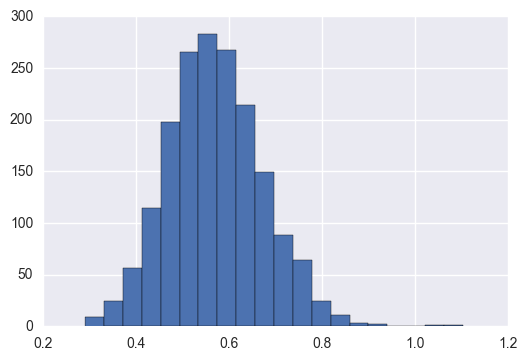

In [106]:
plt.hist(hurst.hurst_values, 20)

In [107]:
with open('hurst_values/bulgarian.txt', 'w') as outfile:
    for v in hurst.hurst_values:
        outfile.write(str(v) + '\n')